# grn bench perturb seq


In [1]:
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer

from bengrn import BenGRN, get_perturb_gt

from bengrn.base import train_classifier

from bengrn import compute_genie3, compute_scenic
from grnndata import utils as grnutils

import scanpy as sc

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
adata = get_perturb_gt()

adata.var["isTF"] = False
adata.var.loc[adata.var.gene_name.isin(grnutils.TF), "isTF"] = True
adata.var["isTF"].sum()
metrics = {}

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/specs/registry.py:249: OldFormatWarning: Element '/X' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/gem_group' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/__categories/gene' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/gene' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/__categories/gene_id' was written without encoding metadata.
  return func(*args, **kwargs)
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/_io/uti

In [3]:
preprocessor = Preprocessor(force_preprocess=True, skip_validate=True,
                            do_postp=False, min_valid_genes_id=5000, min_dataset_size=64)
nadata = preprocessor(adata.copy())
adata

Dropping layers:  KeysView(Layers with keys: )
checking raw counts


removed 0 non primary cells, 10691 renamining


filtered out 0 cells, 10691 renamining
Removed 8 genes.


startin QC


Seeing 10068 outliers (94.17% of total dataset):
done


GRnnData object with n_obs × n_vars = 10691 × 8563
    obs: 'gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript', 'sgID_AB', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI', 'core_scale_factor', 'core_adjusted_UMI_count', 'organism_ontology_term_id'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'isTF'
    varp: 'GRN'
    with a grn of 1115065 elements

In [4]:
model = scPrint.load_from_checkpoint(
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/wli32e2j/last.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt', precpt_gene_emb=None)
#    '../data/temp/25eer0xz/epoch=20-step=105000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
NUM_CELLS = 1024
metrics = {}

2024-06-28 16:56:06,960:INFO - Created a temporary directory at /local/scratch/tmp/tmprg_wcicm


2024-06-28 16:56:06,962:INFO - Writing /local/scratch/tmp/tmprg_wcicm/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [5]:
grn_inferer = GRNfer(model, nadata[nadata.X.sum(1) > 500],
                     how="most var within",
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     num_genes=NUM_GENES,
                     max_cells=NUM_CELLS,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp['all'] = grn.varp["GRN"]

/local/scratch/tmp/ipykernel_3792398/2255780205.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],


Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 8555


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

precision:  0.02072508763433421 
recall:  1.0 
random precision: 0.02072944989230818



  0%|          | 0/128 [00:00<?, ?it/s]


  2%|▏         | 3/128 [00:00<00:04, 25.00it/s]


  5%|▍         | 6/128 [00:00<00:04, 25.10it/s]


  7%|▋         | 9/128 [00:00<00:04, 25.19it/s]


  9%|▉         | 12/128 [00:00<00:04, 25.30it/s]


 12%|█▏        | 15/128 [00:00<00:04, 25.29it/s]


 14%|█▍        | 18/128 [00:00<00:04, 25.31it/s]


 16%|█▋        | 21/128 [00:00<00:04, 25.28it/s]


 19%|█▉        | 24/128 [00:00<00:04, 25.29it/s]


 21%|██        | 27/128 [00:01<00:03, 25.27it/s]


 23%|██▎       | 30/128 [00:01<00:03, 25.23it/s]


 26%|██▌       | 33/128 [00:01<00:03, 25.21it/s]


 28%|██▊       | 36/128 [00:01<00:03, 25.27it/s]


 30%|███       | 39/128 [00:01<00:03, 25.25it/s]


 33%|███▎      | 42/128 [00:01<00:03, 25.20it/s]


 35%|███▌      | 45/128 [00:01<00:03, 25.25it/s]


 38%|███▊      | 48/128 [00:01<00:03, 25.20it/s]


 40%|███▉      | 51/128 [00:02<00:03, 25.22it/s]


 42%|████▏     | 54/128 [00:02<00:02, 25.29it/s]


 45%|████▍     | 57/128 [00:02<00:02, 25.28it/s]


 47%|████▋     | 60/128 [00:02<00:02, 25.23it/s]


 49%|████▉     | 63/128 [00:02<00:02, 25.23it/s]


 52%|█████▏    | 66/128 [00:02<00:02, 25.27it/s]


 54%|█████▍    | 69/128 [00:02<00:02, 25.35it/s]


 56%|█████▋    | 72/128 [00:02<00:02, 25.26it/s]


 59%|█████▊    | 75/128 [00:02<00:02, 25.23it/s]


 61%|██████    | 78/128 [00:03<00:01, 25.18it/s]


 63%|██████▎   | 81/128 [00:03<00:01, 25.24it/s]


 66%|██████▌   | 84/128 [00:03<00:01, 25.29it/s]


 68%|██████▊   | 87/128 [00:03<00:01, 25.28it/s]


 70%|███████   | 90/128 [00:03<00:01, 25.37it/s]


 73%|███████▎  | 93/128 [00:03<00:01, 25.24it/s]


 75%|███████▌  | 96/128 [00:03<00:01, 25.21it/s]


 77%|███████▋  | 99/128 [00:03<00:01, 25.25it/s]


 80%|███████▉  | 102/128 [00:04<00:01, 25.23it/s]


 82%|████████▏ | 105/128 [00:04<00:00, 25.19it/s]


 84%|████████▍ | 108/128 [00:04<00:00, 25.17it/s]


 87%|████████▋ | 111/128 [00:04<00:00, 25.20it/s]


 89%|████████▉ | 114/128 [00:04<00:00, 25.18it/s]


 91%|█████████▏| 117/128 [00:04<00:00, 25.16it/s]


 94%|█████████▍| 120/128 [00:04<00:00, 25.21it/s]


 96%|█████████▌| 123/128 [00:04<00:00, 25.17it/s]


 98%|█████████▊| 126/128 [00:04<00:00, 25.15it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:05<00:00, 25.22it/s]

Area Under Precision-Recall Curve (AUPRC):  0.030646041555596488
EPR: 2.7145869362980646


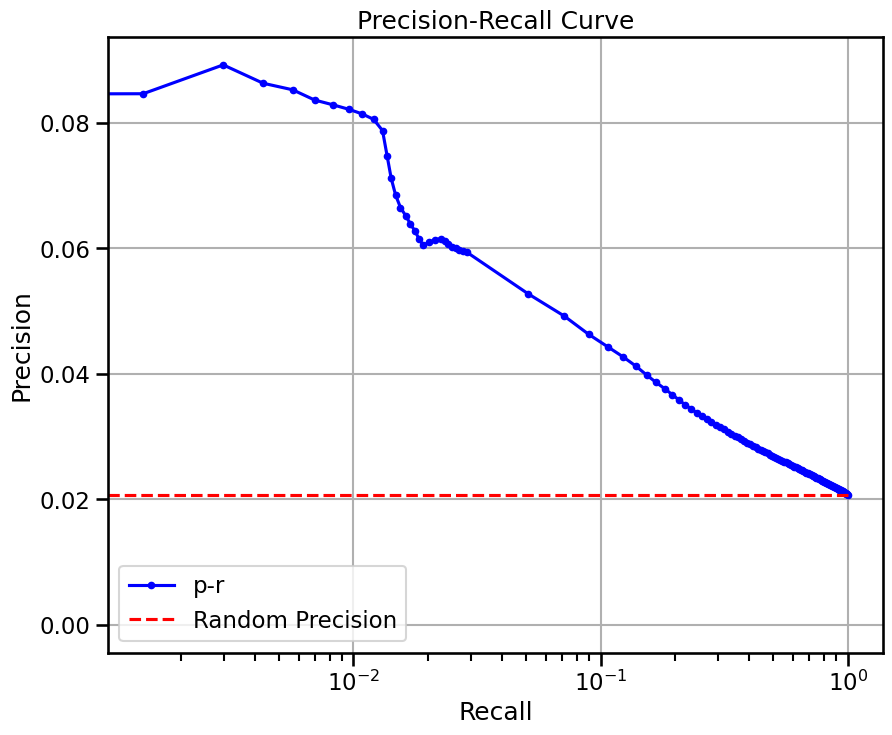

In [6]:
grn.varp['GRN'] = grn.varp["all"].mean(-1).T
metrics['scprint_mean_perturb'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

base enrichment


Top central genes: []


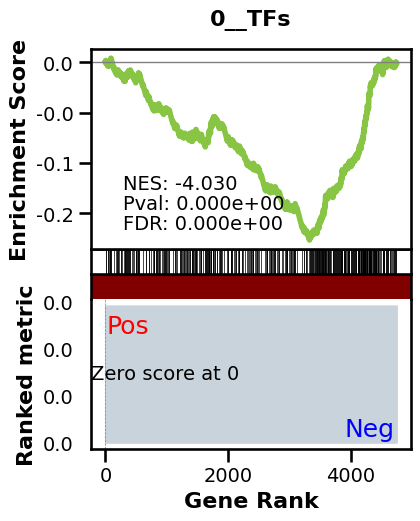

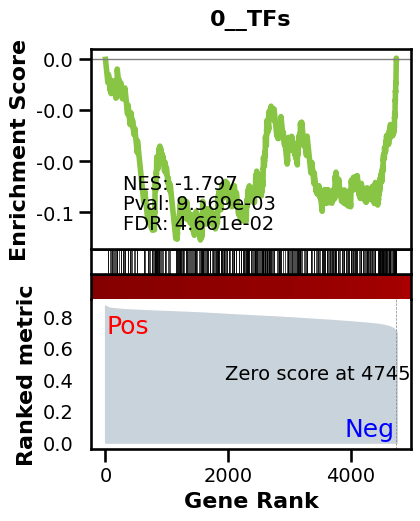

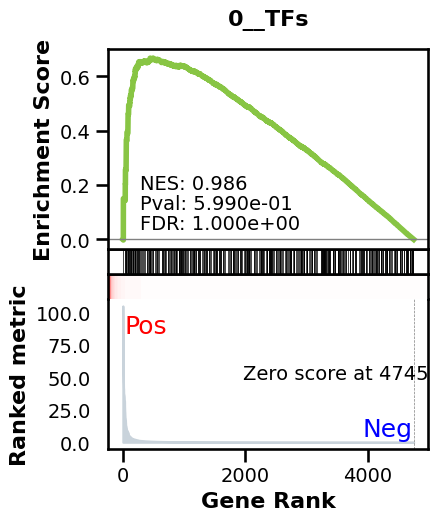

_________________________________________
TF specific enrichment


found some significant results for  8.620689655172415 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3317 genes
intersection pct: 0.6980218855218855
precision:  0.001612544216131459 
recall:  1.0 
random precision: 0.0016130305081146108



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 61.10it/s]


 11%|█         | 14/128 [00:00<00:01, 61.27it/s]


 16%|█▋        | 21/128 [00:00<00:01, 61.24it/s]


 22%|██▏       | 28/128 [00:00<00:01, 61.23it/s]


 27%|██▋       | 35/128 [00:00<00:01, 61.30it/s]


 33%|███▎      | 42/128 [00:00<00:01, 61.37it/s]


 38%|███▊      | 49/128 [00:00<00:01, 61.47it/s]


 44%|████▍     | 56/128 [00:00<00:01, 61.47it/s]


 49%|████▉     | 63/128 [00:01<00:01, 61.55it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 61.54it/s]


 60%|██████    | 77/128 [00:01<00:00, 61.32it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 61.37it/s]


 71%|███████   | 91/128 [00:01<00:00, 61.23it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 61.26it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 61.41it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 61.49it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 61.58it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 61.55it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 61.39it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017144194517914537
EPR: 2.8117070068008254


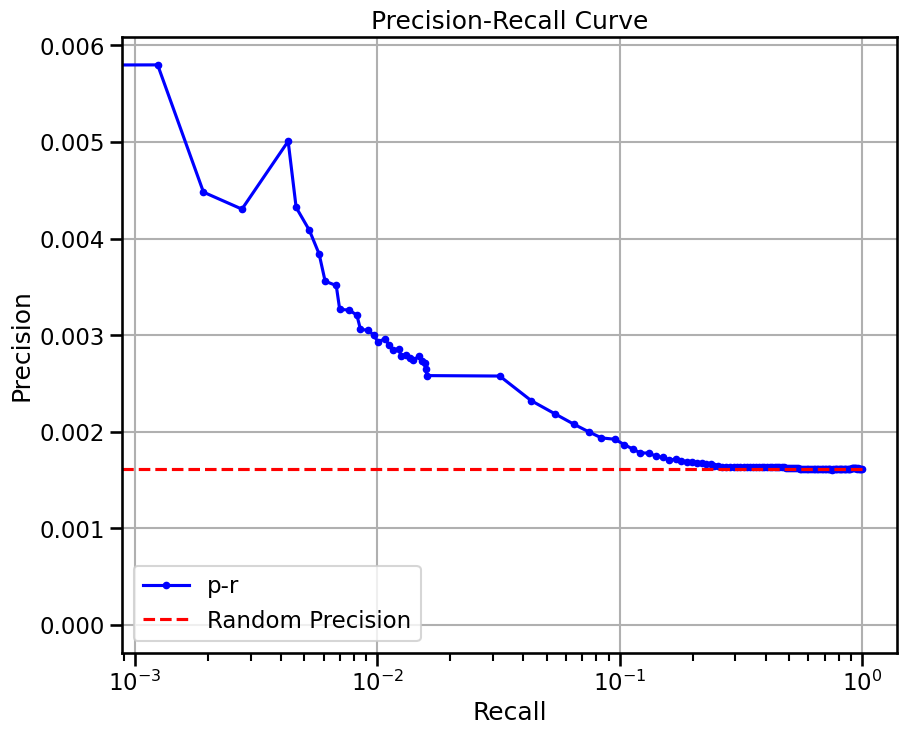

In [7]:
grn.var['ensembl_id'] = grn.var.index
grn.var.index = grn.var['symbol']
grn.varp['GRN'] = grn.varp["all"].mean(-1)
metrics['scprint_mean_perturb_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

true elem 17394 ...


doing classification....


metrics {'used_heads': 105, 'precision': 0.004637297118251077, 'random_precision': 0.001610562441384053, 'recall': 0.008144269924374637, 'predicted_true': 3019.0, 'number_of_true': 1719.0, 'epr': 3.2745460141582026}


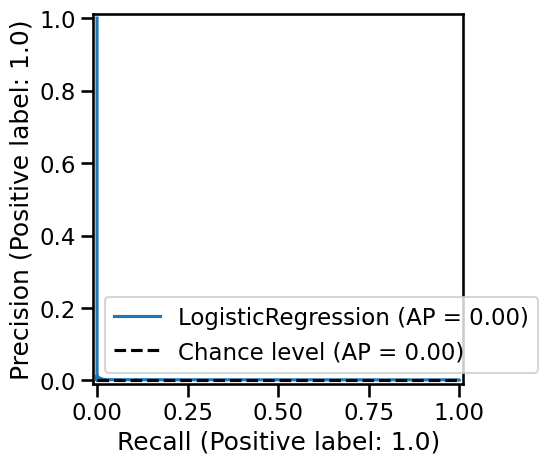

precision:  0.02072508763433421 
recall:  1.0 
random precision: 0.02072944989230818



  0%|          | 0/128 [00:00<?, ?it/s]


  2%|▏         | 3/128 [00:00<00:05, 20.87it/s]


  5%|▍         | 6/128 [00:00<00:05, 20.77it/s]


  7%|▋         | 9/128 [00:00<00:05, 20.75it/s]


  9%|▉         | 12/128 [00:00<00:05, 20.80it/s]


 12%|█▏        | 15/128 [00:00<00:05, 20.79it/s]


 14%|█▍        | 18/128 [00:00<00:05, 20.82it/s]


 16%|█▋        | 21/128 [00:01<00:05, 20.81it/s]


 19%|█▉        | 24/128 [00:01<00:04, 20.81it/s]


 21%|██        | 27/128 [00:01<00:04, 20.82it/s]


 23%|██▎       | 30/128 [00:01<00:04, 20.81it/s]


 26%|██▌       | 33/128 [00:01<00:04, 20.59it/s]


 28%|██▊       | 36/128 [00:01<00:04, 20.62it/s]


 30%|███       | 39/128 [00:01<00:04, 20.66it/s]


 33%|███▎      | 42/128 [00:02<00:04, 20.69it/s]


 35%|███▌      | 45/128 [00:02<00:04, 20.66it/s]


 38%|███▊      | 48/128 [00:02<00:03, 20.67it/s]


 40%|███▉      | 51/128 [00:02<00:03, 20.71it/s]


 42%|████▏     | 54/128 [00:02<00:03, 20.73it/s]


 45%|████▍     | 57/128 [00:02<00:03, 20.77it/s]


 47%|████▋     | 60/128 [00:02<00:03, 20.90it/s]


 49%|████▉     | 63/128 [00:03<00:03, 20.92it/s]


 52%|█████▏    | 66/128 [00:03<00:02, 20.84it/s]


 54%|█████▍    | 69/128 [00:03<00:02, 20.79it/s]


 56%|█████▋    | 72/128 [00:03<00:02, 20.72it/s]


 59%|█████▊    | 75/128 [00:03<00:02, 20.67it/s]


 61%|██████    | 78/128 [00:03<00:02, 20.67it/s]


 63%|██████▎   | 81/128 [00:03<00:02, 20.71it/s]


 66%|██████▌   | 84/128 [00:04<00:02, 20.68it/s]


 68%|██████▊   | 87/128 [00:04<00:01, 20.72it/s]


 70%|███████   | 90/128 [00:04<00:01, 20.70it/s]


 73%|███████▎  | 93/128 [00:04<00:01, 20.59it/s]


 75%|███████▌  | 96/128 [00:04<00:01, 20.56it/s]


 77%|███████▋  | 99/128 [00:04<00:01, 20.62it/s]


 80%|███████▉  | 102/128 [00:04<00:01, 20.63it/s]


 82%|████████▏ | 105/128 [00:05<00:01, 20.37it/s]


 84%|████████▍ | 108/128 [00:05<00:00, 20.48it/s]


 87%|████████▋ | 111/128 [00:05<00:00, 20.57it/s]


 89%|████████▉ | 114/128 [00:05<00:00, 20.65it/s]


 91%|█████████▏| 117/128 [00:05<00:00, 20.68it/s]


 94%|█████████▍| 120/128 [00:05<00:00, 20.71it/s]


 96%|█████████▌| 123/128 [00:05<00:00, 20.76it/s]


 98%|█████████▊| 126/128 [00:06<00:00, 20.77it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:06<00:00, 20.71it/s]

Area Under Precision-Recall Curve (AUPRC):  0.020893444321640642


EPR: 1.2121844844076917


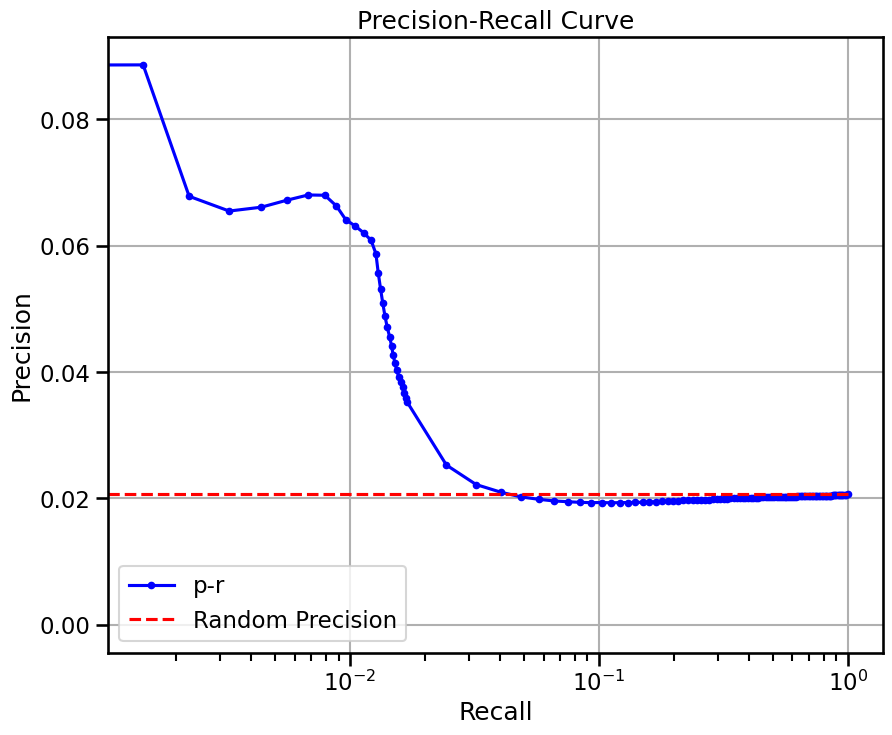

In [8]:
grn.varp['GRN'] = grn.varp["all"]
grn.var.index = grn.var['ensembl_id']
grn, m, clf_omni = train_classifier(grn, C=0.1, train_size=0.9, class_weight={
                                    1: 200, 0: 1}, shuffle=True, use_col="gene_name")
grn.varp['GRN'] = grn.varp['classified'].T

metrics['scprint_omni_perturb'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)


base enrichment


Top central genes: []


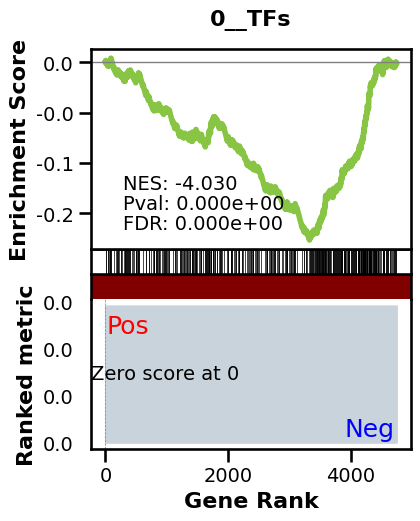

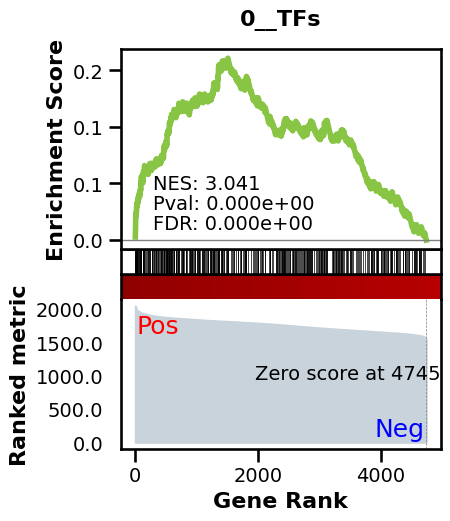

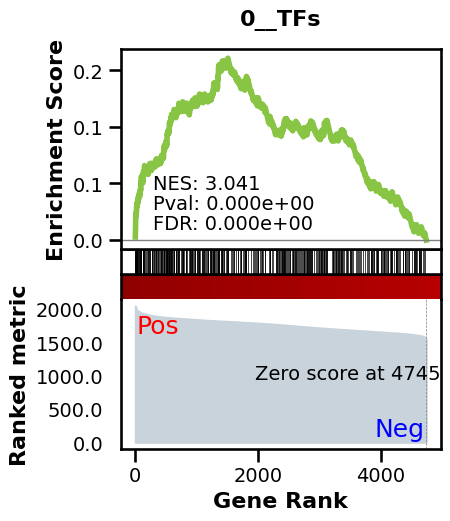

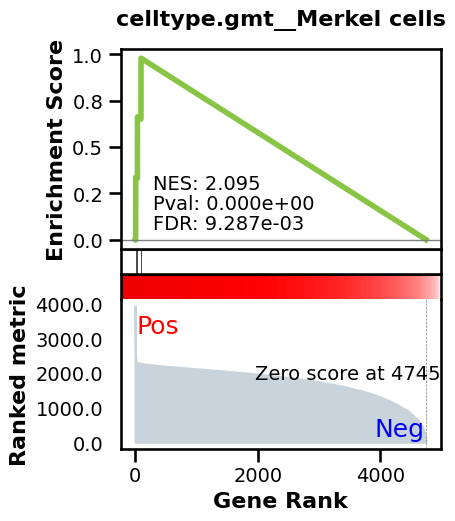

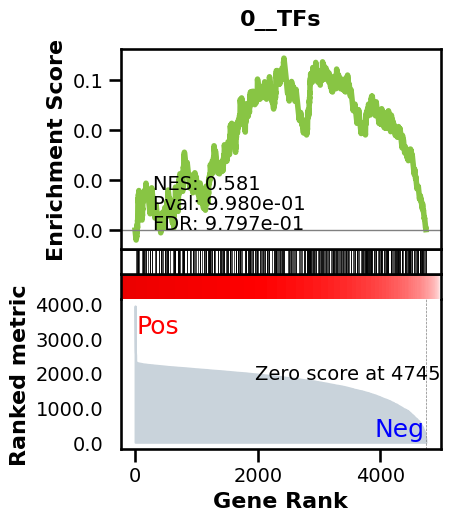

_________________________________________
TF specific enrichment


found some significant results for  3.4482758620689653 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3317 genes
intersection pct: 0.6980218855218855
precision:  0.001612544216131459 
recall:  1.0 
random precision: 0.0016130305081146108



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 50.84it/s]


  9%|▉         | 12/128 [00:00<00:02, 50.93it/s]


 14%|█▍        | 18/128 [00:00<00:02, 50.92it/s]


 19%|█▉        | 24/128 [00:00<00:02, 50.69it/s]


 23%|██▎       | 30/128 [00:00<00:01, 50.38it/s]


 28%|██▊       | 36/128 [00:00<00:01, 50.45it/s]


 33%|███▎      | 42/128 [00:00<00:01, 50.56it/s]


 38%|███▊      | 48/128 [00:00<00:01, 50.63it/s]


 42%|████▏     | 54/128 [00:01<00:01, 50.67it/s]


 47%|████▋     | 60/128 [00:01<00:01, 50.71it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 50.75it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 50.76it/s]


 61%|██████    | 78/128 [00:01<00:00, 50.79it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 50.73it/s]


 70%|███████   | 90/128 [00:01<00:00, 50.74it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 50.70it/s]


 80%|███████▉  | 102/128 [00:02<00:00, 50.71it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 50.73it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 50.70it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 50.69it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 50.69it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 50.67it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018935257413173177
EPR: 4.702666604157438


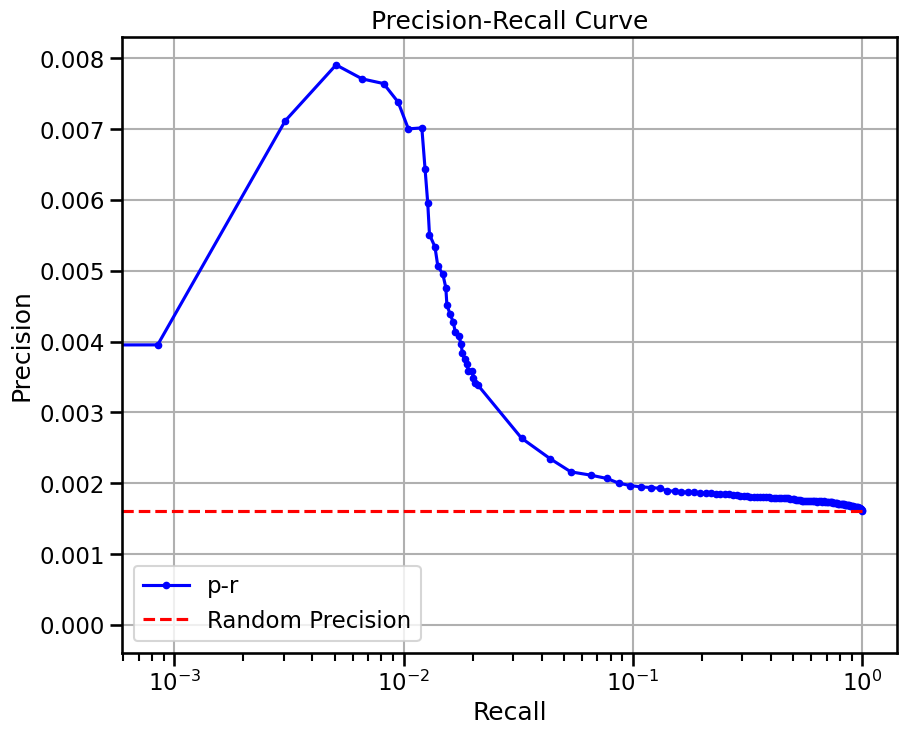

In [9]:
grn.var.index = grn.var['symbol']
grn.varp['GRN'] = grn.varp['classified']
metrics['scprint_omni_perturb_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

In [10]:
import numpy as np

pred shape (2920, 4752, 128)
true elem 287578 ...


doing classification....


metrics {'used_heads': 110, 'precision': 0.050776845264714515, 'random_precision': 0.02150860776716941, 'recall': 0.24804824928798794, 'predicted_true': 728974, 'number_of_true': 149225, 'epr': 3.6406252443299665}


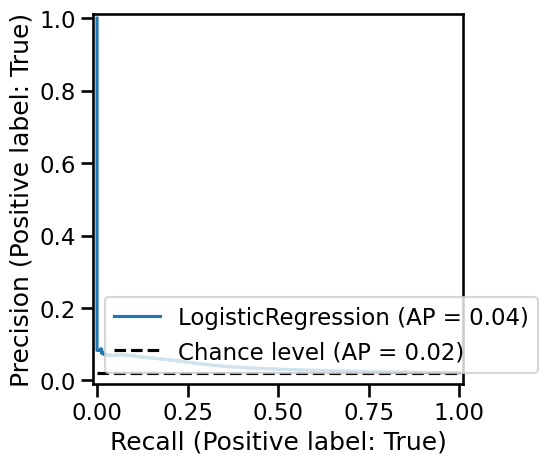

In [11]:
grn.varp['GRN'] = np.transpose(grn.varp['all'], (1,0,2))
grn.var.index = grn.var['ensembl_id']
grn, m, clf_self = train_classifier(grn, other=adata, C=0.8, train_size=0.5, class_weight={
                               1: 30, 0: 1}, shuffle=False, use_col="ensembl_id")
grn.varp['GRN'] = grn.varp['classified']

precision:  0.020727188997365954 
recall:  0.9997844063175904 
random precision: 0.02072944989230818



  0%|          | 0/128 [00:00<?, ?it/s]


  2%|▏         | 2/128 [00:00<00:07, 17.01it/s]


  3%|▎         | 4/128 [00:00<00:07, 17.28it/s]


  5%|▍         | 6/128 [00:00<00:06, 17.57it/s]


  6%|▋         | 8/128 [00:00<00:06, 17.70it/s]


  8%|▊         | 10/128 [00:00<00:06, 17.79it/s]


  9%|▉         | 12/128 [00:00<00:06, 17.80it/s]


 11%|█         | 14/128 [00:00<00:06, 17.83it/s]


 12%|█▎        | 16/128 [00:00<00:06, 17.58it/s]


 14%|█▍        | 18/128 [00:01<00:06, 17.36it/s]


 16%|█▌        | 20/128 [00:01<00:06, 17.22it/s]


 17%|█▋        | 22/128 [00:01<00:06, 17.10it/s]


 19%|█▉        | 24/128 [00:01<00:06, 17.03it/s]


 20%|██        | 26/128 [00:01<00:06, 16.98it/s]


 22%|██▏       | 28/128 [00:01<00:05, 16.95it/s]


 23%|██▎       | 30/128 [00:01<00:05, 16.93it/s]


 25%|██▌       | 32/128 [00:01<00:05, 16.94it/s]


 27%|██▋       | 34/128 [00:01<00:05, 16.78it/s]


 28%|██▊       | 36/128 [00:02<00:05, 16.80it/s]


 30%|██▉       | 38/128 [00:02<00:05, 16.84it/s]


 31%|███▏      | 40/128 [00:02<00:05, 16.89it/s]


 33%|███▎      | 42/128 [00:02<00:05, 17.08it/s]


 34%|███▍      | 44/128 [00:02<00:04, 17.24it/s]


 36%|███▌      | 46/128 [00:02<00:04, 17.42it/s]


 38%|███▊      | 48/128 [00:02<00:04, 17.55it/s]


 39%|███▉      | 50/128 [00:02<00:04, 17.65it/s]


 41%|████      | 52/128 [00:03<00:04, 17.54it/s]


 42%|████▏     | 54/128 [00:03<00:04, 17.31it/s]


 44%|████▍     | 56/128 [00:03<00:04, 17.17it/s]


 45%|████▌     | 58/128 [00:03<00:04, 17.06it/s]


 47%|████▋     | 60/128 [00:03<00:04, 16.96it/s]


 48%|████▊     | 62/128 [00:03<00:03, 16.89it/s]


 50%|█████     | 64/128 [00:03<00:03, 16.87it/s]


 52%|█████▏    | 66/128 [00:03<00:03, 16.83it/s]


 53%|█████▎    | 68/128 [00:03<00:03, 16.83it/s]


 55%|█████▍    | 70/128 [00:04<00:03, 16.81it/s]


 56%|█████▋    | 72/128 [00:04<00:03, 16.78it/s]


 58%|█████▊    | 74/128 [00:04<00:03, 16.78it/s]


 59%|█████▉    | 76/128 [00:04<00:03, 16.81it/s]


 61%|██████    | 78/128 [00:04<00:02, 16.96it/s]


 62%|██████▎   | 80/128 [00:04<00:02, 17.22it/s]


 64%|██████▍   | 82/128 [00:04<00:02, 17.41it/s]


 66%|██████▌   | 84/128 [00:04<00:02, 17.55it/s]


 67%|██████▋   | 86/128 [00:05<00:02, 17.61it/s]


 69%|██████▉   | 88/128 [00:05<00:02, 17.70it/s]


 70%|███████   | 90/128 [00:05<00:02, 17.58it/s]


 72%|███████▏  | 92/128 [00:05<00:02, 17.18it/s]


 73%|███████▎  | 94/128 [00:05<00:01, 17.02it/s]


 75%|███████▌  | 96/128 [00:05<00:01, 16.97it/s]


 77%|███████▋  | 98/128 [00:05<00:01, 16.97it/s]


 78%|███████▊  | 100/128 [00:05<00:01, 16.96it/s]


 80%|███████▉  | 102/128 [00:05<00:01, 16.97it/s]


 81%|████████▏ | 104/128 [00:06<00:01, 16.97it/s]


 83%|████████▎ | 106/128 [00:06<00:01, 16.93it/s]


 84%|████████▍ | 108/128 [00:06<00:01, 16.92it/s]


 86%|████████▌ | 110/128 [00:06<00:01, 16.92it/s]


 88%|████████▊ | 112/128 [00:06<00:00, 16.90it/s]


 89%|████████▉ | 114/128 [00:06<00:00, 16.89it/s]


 91%|█████████ | 116/128 [00:06<00:00, 17.02it/s]


 92%|█████████▏| 118/128 [00:06<00:00, 17.28it/s]


 94%|█████████▍| 120/128 [00:06<00:00, 17.46it/s]


 95%|█████████▌| 122/128 [00:07<00:00, 17.60it/s]


 97%|█████████▋| 124/128 [00:07<00:00, 17.69it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



 98%|█████████▊| 126/128 [00:07<00:00, 17.72it/s]


100%|██████████| 128/128 [00:07<00:00, 17.57it/s]


100%|██████████| 128/128 [00:07<00:00, 17.19it/s]

Area Under Precision-Recall Curve (AUPRC):  0.03693156694894342
EPR: 3.770978344669904


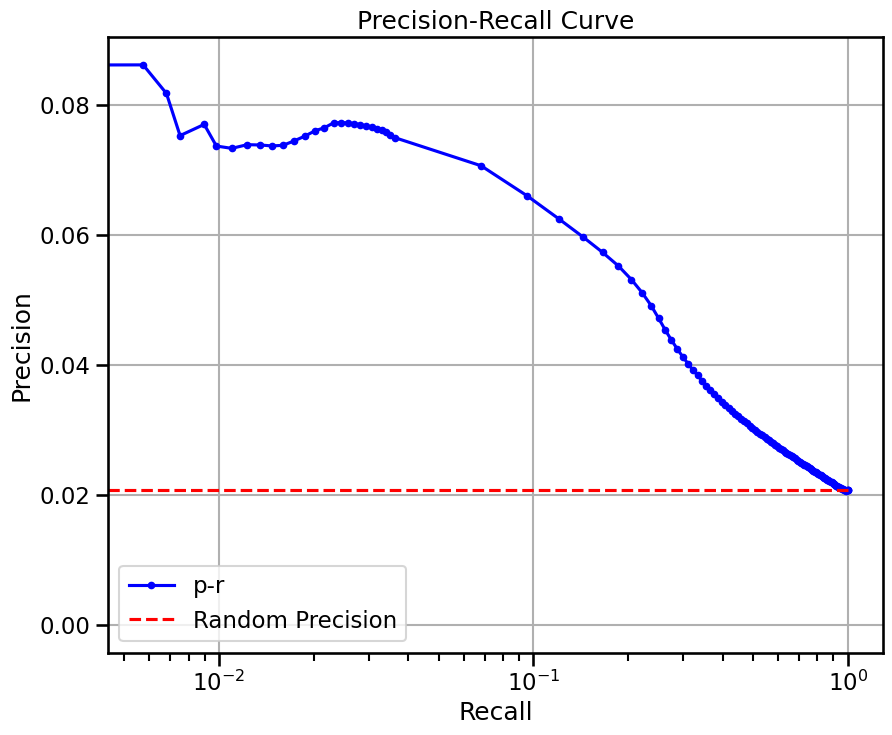

In [12]:
metrics['scprint_self_perturb'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

base enrichment


Top central genes: []


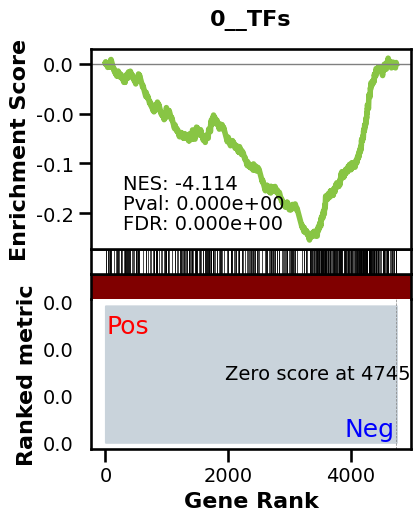

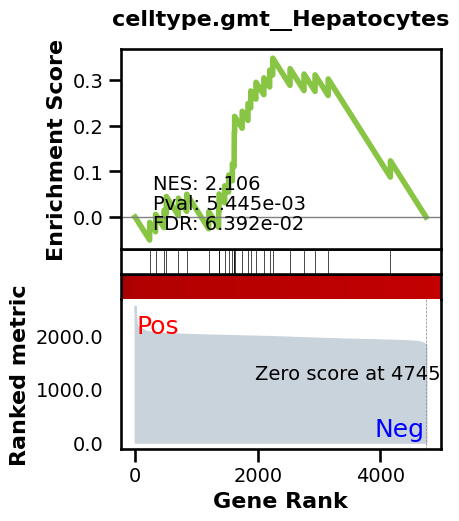

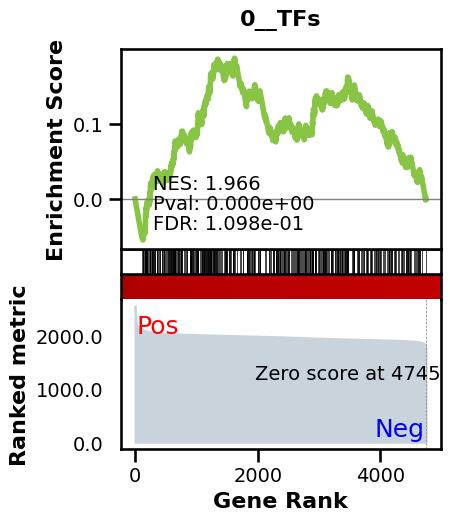

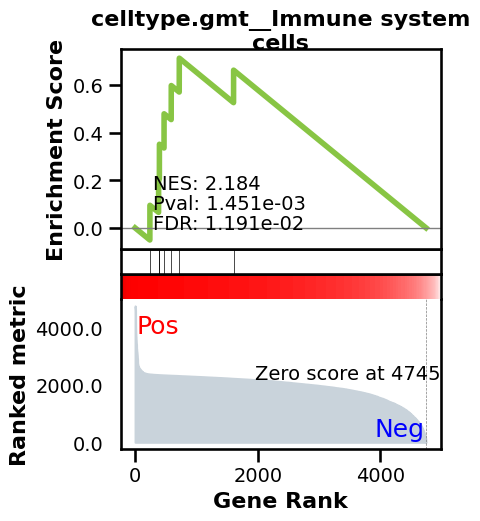

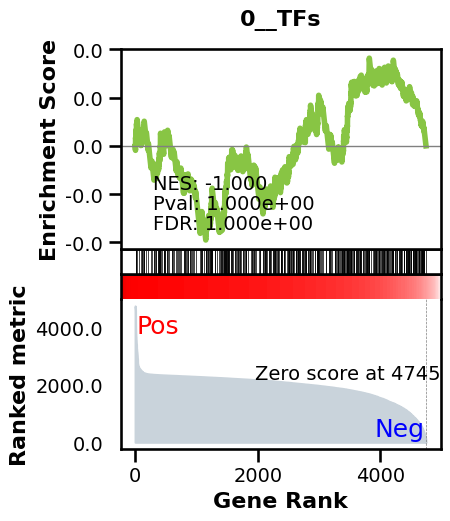

_________________________________________
TF specific enrichment


found some significant results for  5.172413793103448 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3317 genes
intersection pct: 0.6980218855218855
precision:  0.001612544216131459 
recall:  1.0 
random precision: 0.0016130305081146108



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 52.53it/s]


  9%|▉         | 12/128 [00:00<00:02, 52.04it/s]


 14%|█▍        | 18/128 [00:00<00:02, 51.95it/s]


 19%|█▉        | 24/128 [00:00<00:01, 52.01it/s]


 23%|██▎       | 30/128 [00:00<00:01, 52.03it/s]


 28%|██▊       | 36/128 [00:00<00:01, 51.88it/s]


 33%|███▎      | 42/128 [00:00<00:01, 51.95it/s]


 38%|███▊      | 48/128 [00:00<00:01, 51.93it/s]


 42%|████▏     | 54/128 [00:01<00:01, 51.64it/s]


 47%|████▋     | 60/128 [00:01<00:01, 51.53it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 51.61it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 51.67it/s]


 61%|██████    | 78/128 [00:01<00:00, 51.75it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 51.80it/s]


 70%|███████   | 90/128 [00:01<00:00, 51.86it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 51.85it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 51.97it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 51.93it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 51.93it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 51.94it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

 98%|█████████▊| 126/128 [00:02<00:00, 51.85it/s]


100%|██████████| 128/128 [00:02<00:00, 51.82it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0019066691387204287
EPR: 1.6105199267557528


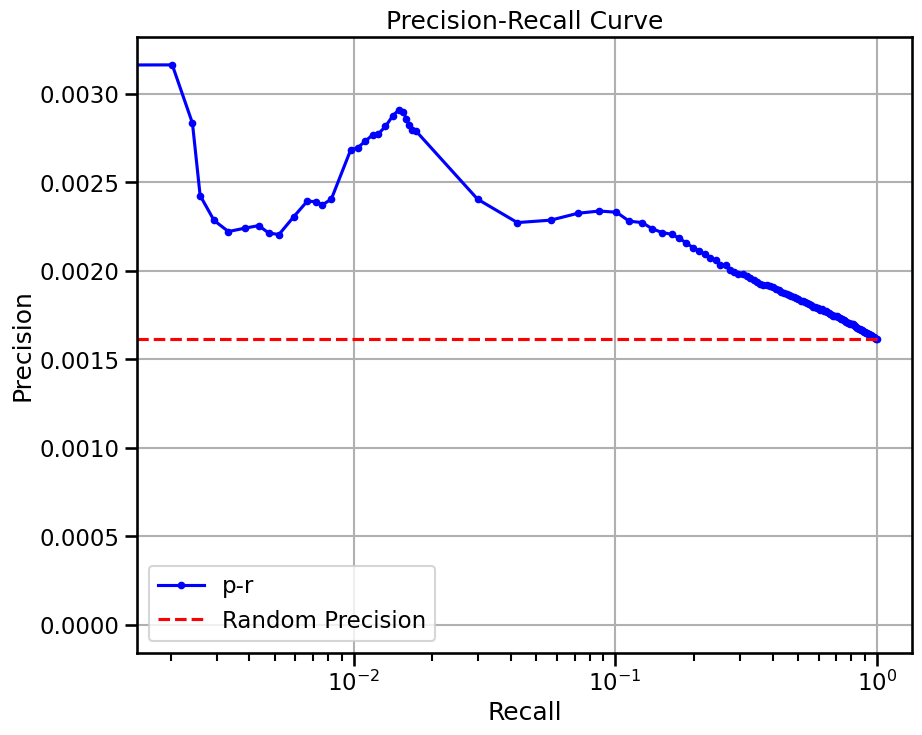

In [13]:
grn.varp['GRN'] = grn.varp['classified'].T
grn.var.index = grn.var['symbol']
metrics['scprint_self_perturb_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

/local/scratch/tmp/ipykernel_3792398/514778756.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 90459121, sparsity: 1.0


precision:  0.024385833256147023 
recall:  1.0 
random precision: 0.02438880351598334



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:17,  7.26it/s]


  2%|▏         | 2/128 [00:00<00:17,  7.20it/s]


  2%|▏         | 3/128 [00:00<00:17,  7.21it/s]


  3%|▎         | 4/128 [00:00<00:17,  7.21it/s]


  4%|▍         | 5/128 [00:00<00:17,  7.19it/s]


  5%|▍         | 6/128 [00:00<00:16,  7.18it/s]


  5%|▌         | 7/128 [00:00<00:16,  7.20it/s]


  6%|▋         | 8/128 [00:01<00:16,  7.20it/s]


  7%|▋         | 9/128 [00:01<00:16,  7.19it/s]


  8%|▊         | 10/128 [00:01<00:16,  7.21it/s]


  9%|▊         | 11/128 [00:01<00:16,  7.20it/s]


  9%|▉         | 12/128 [00:01<00:16,  7.18it/s]


 10%|█         | 13/128 [00:01<00:15,  7.20it/s]


 11%|█         | 14/128 [00:01<00:15,  7.20it/s]


 12%|█▏        | 15/128 [00:02<00:15,  7.18it/s]


 12%|█▎        | 16/128 [00:02<00:15,  7.19it/s]


 13%|█▎        | 17/128 [00:02<00:15,  7.16it/s]


 14%|█▍        | 18/128 [00:02<00:15,  7.14it/s]


 15%|█▍        | 19/128 [00:02<00:15,  7.16it/s]


 16%|█▌        | 20/128 [00:02<00:15,  7.15it/s]


 16%|█▋        | 21/128 [00:02<00:14,  7.17it/s]


 17%|█▋        | 22/128 [00:03<00:14,  7.19it/s]


 18%|█▊        | 23/128 [00:03<00:14,  7.18it/s]


 19%|█▉        | 24/128 [00:03<00:14,  7.20it/s]


 20%|█▉        | 25/128 [00:03<00:14,  7.16it/s]


 20%|██        | 26/128 [00:03<00:14,  7.17it/s]


 21%|██        | 27/128 [00:03<00:14,  7.19it/s]


 22%|██▏       | 28/128 [00:03<00:13,  7.20it/s]


 23%|██▎       | 29/128 [00:04<00:13,  7.17it/s]


 23%|██▎       | 30/128 [00:04<00:13,  7.16it/s]


 24%|██▍       | 31/128 [00:04<00:13,  7.14it/s]


 25%|██▌       | 32/128 [00:04<00:13,  7.19it/s]


 26%|██▌       | 33/128 [00:04<00:13,  7.22it/s]


 27%|██▋       | 34/128 [00:04<00:13,  7.19it/s]


 27%|██▋       | 35/128 [00:04<00:12,  7.21it/s]


 28%|██▊       | 36/128 [00:05<00:12,  7.20it/s]


 29%|██▉       | 37/128 [00:05<00:12,  7.15it/s]


 30%|██▉       | 38/128 [00:05<00:12,  7.14it/s]


 30%|███       | 39/128 [00:05<00:12,  7.15it/s]


 31%|███▏      | 40/128 [00:05<00:12,  7.17it/s]


 32%|███▏      | 41/128 [00:05<00:12,  7.19it/s]


 33%|███▎      | 42/128 [00:05<00:11,  7.20it/s]


 34%|███▎      | 43/128 [00:05<00:11,  7.18it/s]


 34%|███▍      | 44/128 [00:06<00:11,  7.19it/s]


 35%|███▌      | 45/128 [00:06<00:11,  7.15it/s]


 36%|███▌      | 46/128 [00:06<00:11,  7.18it/s]


 37%|███▋      | 47/128 [00:06<00:11,  7.18it/s]


 38%|███▊      | 48/128 [00:06<00:11,  7.18it/s]


 38%|███▊      | 49/128 [00:06<00:11,  7.17it/s]


 39%|███▉      | 50/128 [00:06<00:10,  7.21it/s]


 40%|███▉      | 51/128 [00:07<00:10,  7.19it/s]


 41%|████      | 52/128 [00:07<00:10,  7.18it/s]


 41%|████▏     | 53/128 [00:07<00:10,  7.19it/s]


 42%|████▏     | 54/128 [00:07<00:10,  7.18it/s]


 43%|████▎     | 55/128 [00:07<00:10,  7.18it/s]


 44%|████▍     | 56/128 [00:07<00:10,  7.19it/s]


 45%|████▍     | 57/128 [00:07<00:09,  7.18it/s]


 45%|████▌     | 58/128 [00:08<00:09,  7.17it/s]


 46%|████▌     | 59/128 [00:08<00:09,  7.19it/s]


 47%|████▋     | 60/128 [00:08<00:09,  7.20it/s]


 48%|████▊     | 61/128 [00:08<00:09,  7.21it/s]


 48%|████▊     | 62/128 [00:08<00:09,  7.22it/s]


 49%|████▉     | 63/128 [00:08<00:09,  7.22it/s]


 50%|█████     | 64/128 [00:08<00:08,  7.19it/s]


 51%|█████     | 65/128 [00:09<00:08,  7.22it/s]


 52%|█████▏    | 66/128 [00:09<00:08,  7.24it/s]


 52%|█████▏    | 67/128 [00:09<00:08,  7.22it/s]


 53%|█████▎    | 68/128 [00:09<00:08,  7.20it/s]


 54%|█████▍    | 69/128 [00:09<00:08,  7.21it/s]


 55%|█████▍    | 70/128 [00:09<00:08,  7.20it/s]


 55%|█████▌    | 71/128 [00:09<00:07,  7.20it/s]


 56%|█████▋    | 72/128 [00:10<00:07,  7.20it/s]


 57%|█████▋    | 73/128 [00:10<00:07,  7.20it/s]


 58%|█████▊    | 74/128 [00:10<00:07,  7.23it/s]


 59%|█████▊    | 75/128 [00:10<00:07,  7.25it/s]


 59%|█████▉    | 76/128 [00:10<00:07,  7.24it/s]


 60%|██████    | 77/128 [00:10<00:07,  7.21it/s]


 61%|██████    | 78/128 [00:10<00:06,  7.21it/s]


 62%|██████▏   | 79/128 [00:10<00:06,  7.19it/s]


 62%|██████▎   | 80/128 [00:11<00:06,  7.19it/s]


 63%|██████▎   | 81/128 [00:11<00:06,  7.17it/s]


 64%|██████▍   | 82/128 [00:11<00:06,  7.19it/s]


 65%|██████▍   | 83/128 [00:11<00:06,  7.22it/s]


 66%|██████▌   | 84/128 [00:11<00:06,  7.23it/s]


 66%|██████▋   | 85/128 [00:11<00:05,  7.23it/s]


 67%|██████▋   | 86/128 [00:11<00:05,  7.22it/s]


 68%|██████▊   | 87/128 [00:12<00:05,  7.21it/s]


 69%|██████▉   | 88/128 [00:12<00:05,  7.20it/s]


 70%|██████▉   | 89/128 [00:12<00:05,  7.21it/s]


 70%|███████   | 90/128 [00:12<00:05,  7.19it/s]


 71%|███████   | 91/128 [00:12<00:05,  7.20it/s]


 72%|███████▏  | 92/128 [00:12<00:05,  7.19it/s]


 73%|███████▎  | 93/128 [00:12<00:04,  7.21it/s]


 73%|███████▎  | 94/128 [00:13<00:04,  7.18it/s]


 74%|███████▍  | 95/128 [00:13<00:04,  7.17it/s]


 75%|███████▌  | 96/128 [00:13<00:04,  7.17it/s]


 76%|███████▌  | 97/128 [00:13<00:04,  7.18it/s]


 77%|███████▋  | 98/128 [00:13<00:04,  7.19it/s]


 77%|███████▋  | 99/128 [00:13<00:04,  7.20it/s]


 78%|███████▊  | 100/128 [00:13<00:03,  7.19it/s]


 79%|███████▉  | 101/128 [00:14<00:03,  7.17it/s]


 80%|███████▉  | 102/128 [00:14<00:03,  7.18it/s]


 80%|████████  | 103/128 [00:14<00:03,  7.17it/s]


 81%|████████▏ | 104/128 [00:14<00:03,  7.16it/s]


 82%|████████▏ | 105/128 [00:14<00:03,  7.18it/s]


 83%|████████▎ | 106/128 [00:14<00:03,  7.19it/s]


 84%|████████▎ | 107/128 [00:14<00:02,  7.19it/s]


 84%|████████▍ | 108/128 [00:15<00:02,  7.20it/s]


 85%|████████▌ | 109/128 [00:15<00:02,  7.21it/s]


 86%|████████▌ | 110/128 [00:15<00:02,  7.23it/s]


 87%|████████▋ | 111/128 [00:15<00:02,  7.22it/s]


 88%|████████▊ | 112/128 [00:15<00:02,  7.21it/s]


 88%|████████▊ | 113/128 [00:15<00:02,  7.21it/s]


 89%|████████▉ | 114/128 [00:15<00:01,  7.23it/s]


 90%|████████▉ | 115/128 [00:15<00:01,  7.23it/s]


 91%|█████████ | 116/128 [00:16<00:01,  7.24it/s]


 91%|█████████▏| 117/128 [00:16<00:01,  7.21it/s]


 92%|█████████▏| 118/128 [00:16<00:01,  7.24it/s]


 93%|█████████▎| 119/128 [00:16<00:01,  7.23it/s]


 94%|█████████▍| 120/128 [00:16<00:01,  7.23it/s]


 95%|█████████▍| 121/128 [00:16<00:00,  7.22it/s]


 95%|█████████▌| 122/128 [00:16<00:00,  7.24it/s]


 96%|█████████▌| 123/128 [00:17<00:00,  7.21it/s]


 97%|█████████▋| 124/128 [00:17<00:00,  7.20it/s]


 98%|█████████▊| 125/128 [00:17<00:00,  7.19it/s]


 98%|█████████▊| 126/128 [00:17<00:00,  7.18it/s]


 99%|█████████▉| 127/128 [00:17<00:00,  7.19it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:17<00:00,  7.16it/s]


100%|██████████| 128/128 [00:17<00:00,  7.19it/s]

Area Under Precision-Recall Curve (AUPRC):  0.03594487989409277


EPR: 2.6928550859163627


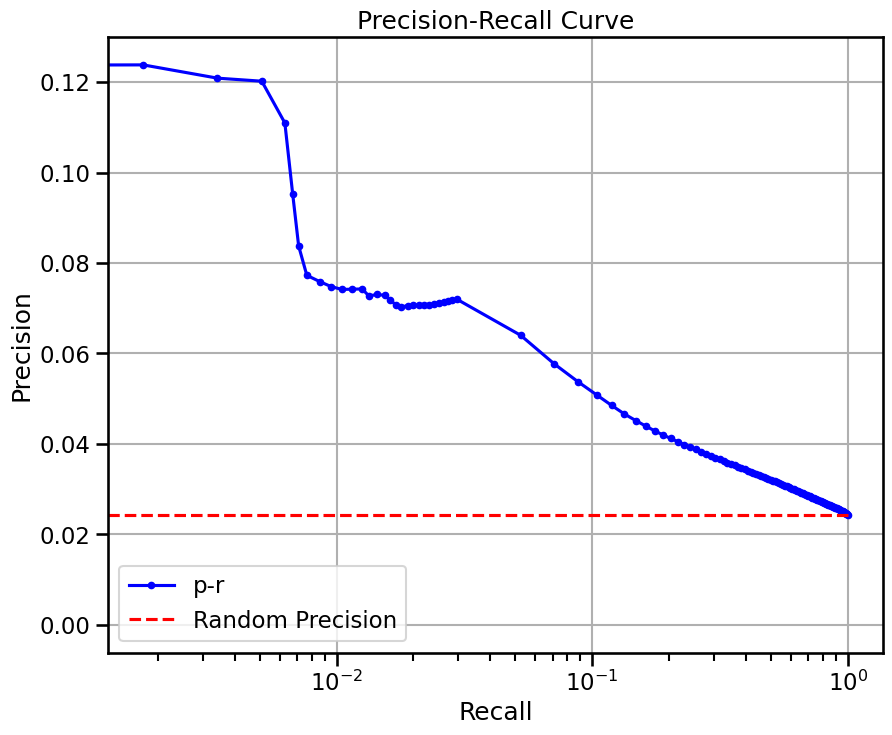

In [14]:
grn_inferer = GRNfer(model, nadata[nadata.X.sum(1) > 500],
                     how="random expr",
                     preprocess="softmax",
                     head_agg='mean',
                     filtration="none",
                     forward_mode="none",
                     organisms=adata.obs['organism_ontology_term_id'][0],
                     num_genes=3000,
                     max_cells=NUM_CELLS,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp['GRN'] = grn.varp['GRN'].T
metrics["scprint_full_perturb"] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

In [15]:
metrics

{'scprint_mean_perturb': {'precision': 0.02072508763433421,
  'recall': 1.0,
  'rand_precision': 0.02072944989230818,
  'auprc': 0.030646041555596488,
  'epr': 2.7145869362980646},
 'scprint_mean_perturb_base': {'TF_enr': True,
  'significant_enriched_TFtargets': 8.620689655172415,
  'precision': 0.001612544216131459,
  'recall': 1.0,
  'rand_precision': 0.0016130305081146108,
  'auprc': 0.0017144194517914537,
  'epr': 2.8117070068008254},
 'scprint_omni_perturb': {'precision': 0.02072508763433421,
  'recall': 1.0,
  'rand_precision': 0.02072944989230818,
  'auprc': 0.020893444321640642,
  'epr': 1.2121844844076917},
 'scprint_omni_perturb_base': {'TF_enr': True,
  'enriched_terms_Targets': ['0__TFs',
   'celltype.gmt__Pulmonary alveolar type I cells',
   'celltype.gmt__Granulocytes',
   'celltype.gmt__Pulmonary alveolar type II cells',
   'celltype.gmt__Satellite cells'],
  'enriched_terms_Regulators': ['celltype.gmt__Merkel cells',
   'celltype.gmt__Immune system cells'],
  'signific

In [1]:
import pandas as pd

In [9]:
res = []
res2 = []
for k, v in metrics.items():
    if k.split('_')[-1] == "base":
        res2.append([k.split('_')[-2], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])
    else:
        res.append(["_".join(k.split('_')[-2:-1]), v['epr'], v['auprc'], v['rand_precision'], 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_only'])
df2 = pd.DataFrame(res2, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_only
0,mean,2.714587,0.030646,0.020729,False
1,omni,1.212184,0.020893,0.020729,False
2,self,3.770978,0.036932,0.020729,False
3,full,2.692855,0.035945,0.024389,False


In [18]:
df2

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,perturb,2.811707,0.001714,0.001613,8.620690,True,False
1,perturb,4.702667,0.001894,0.001613,3.448276,True,False
2,perturb,1.610520,0.001907,0.001613,5.172414,True,False
